In [79]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install keras
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1b/66/2f47c39cfedb29188d82555d0184a619a0bf8234fd5e5301940efb0aa464/tensorflow-2.13.0-cp39-cp39-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2b/ad/d3a2e335004d178e0599cf8aff6c2a92cd21eb9789358fb8f3f951009930/tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/a0/62/9790f98aa125a035cda91be7a41a46bdc76b26ffdd2ad2d3c5b7f7232946/h5py-3.9

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df=pd.read_csv("Churn_Modelling.csv")

In [5]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
geography=pd.get_dummies(X['Geography'],dtype=int)
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [7]:
gender=pd.get_dummies(X['Gender'],drop_first=True,dtype=int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [8]:
X=pd.concat([X,geography,gender],axis=1)

In [9]:
X=X.drop(['Geography','Gender'],axis=1) 
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense 

In [14]:
classifier=Sequential()

In [15]:
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu',input_dim=12))

In [16]:
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))

In [17]:
classifier.add(Dense(1,kernel_initializer='glorot_uniform',activation='relu'))

In [18]:
classifier.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [19]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 [==============================] - 1s 1ms/step - loss: 4.2277 - accuracy: 0.4579 - val_loss: 2.6548 - val_accuracy: 0.5437
Epoch 2/10
536/536 [==============================] - 0s 865us/step - loss: 1.7962 - accuracy: 0.6244 - val_loss: 1.3310 - val_accuracy: 0.6664
Epoch 3/10
536/536 [==============================] - 0s 856us/step - loss: 0.9973 - accuracy: 0.6637 - val_loss: 0.7725 - val_accuracy: 0.6944
Epoch 4/10
536/536 [==============================] - 0s 878us/step - loss: 0.7581 - accuracy: 0.6981 - val_loss: 0.6583 - val_accuracy: 0.7175
Epoch 5/10
536/536 [==============================] - 0s 849us/step - loss: 0.6353 - accuracy: 0.7309 - val_loss: 0.5560 - val_accuracy: 0.7645
Epoch 6/10
536/536 [==============================] - 0s 856us/step - loss: 0.6106 - accuracy: 0.7641 - val_loss: 0.5452 - val_accuracy: 0.7709
Epoch 7/10
536/536 [==============================] - 0s 852us/step - loss: 0.5614 - accuracy: 0.7645 - val_loss: 0.5141 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


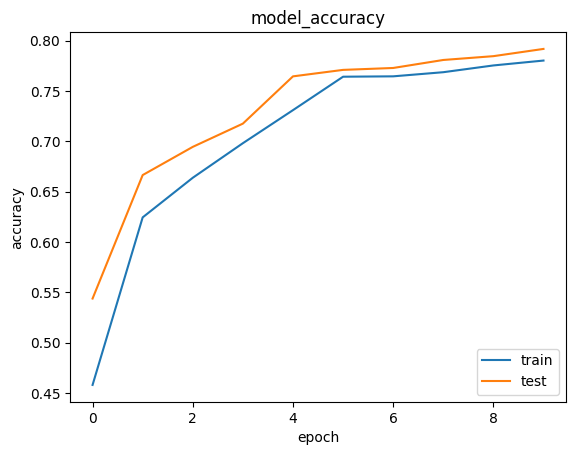

In [20]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

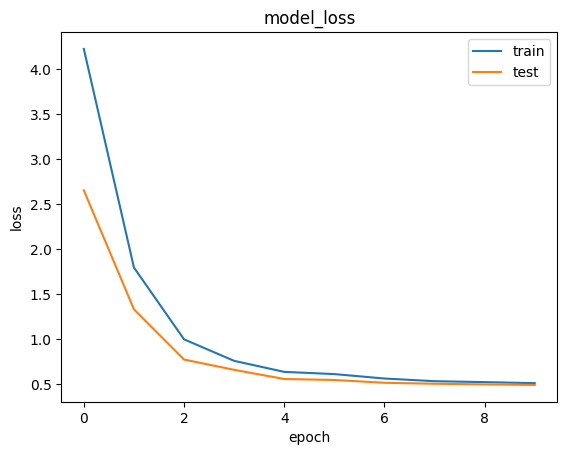

In [21]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()